In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Data

In [56]:
#Load CFashionMNIST dataset
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0,),(1.0,))])

trainset = torchvision.datasets.FashionMNIST(root='Data',
                                             train=True,
                                             download=True,
                                             transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=1024,
                                          num_workers=10,
                                          shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='Data',
                                             train=False,
                                             download=True,
                                             transform=transform)
testloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=1024,
                                          num_workers=10,
                                          shuffle=False)

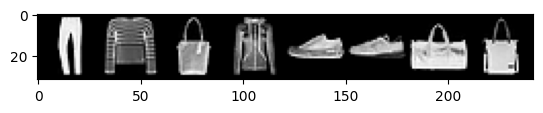

In [57]:
import  matplotlib.pyplot as plt
import numpy as np

#Fuction to display the images
def imshow(img):
    #img = img / 255.0
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

for i, (images, labels) in  enumerate(trainloader, 0):
    #Plot some images
    imshow(torchvision.utils.make_grid(images[:8]))
    break

# Model

In [58]:
model = nn.Sequential(nn.Flatten(),
                      nn.Linear(784, 10))

print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)


In [59]:
#Generating as random tensor
input_tensor = torch.rand(5, 28, 28)

output = model(input_tensor)
print(output.shape)

torch.Size([5, 10])


# Loss, Optimizer and Evaluation Function

In [60]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),
                      lr=0.01)

In [61]:
#Function to compute loss and accuracy for test set
def evaluate(model, testloader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss = test_loss + loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total = total + labels.size(0)
            correct = correct + (predicted == labels).sum().item()

    accuracy = 100*correct / total
    test_loss = test_loss / len(testloader)
    return test_loss, accuracy

In [62]:
test_loss, test_accuracy = evaluate(model, testloader, criterion)
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')

test_loss: 2.333759970584158
test_accuracy: 7.528333333333333


# Train

In [63]:
#some parameter
train_losses = []
train_accuaracies = []
test_losses = []
test_accuracies = []
max_epoch = 20

In [64]:
#train
for epoch in range(max_epoch):
    running_loss = 0.0
    running_correct = 0.0
    total = 0.0

    for i, (inputs, labels) in enumerate(trainloader, 0):
        #Zero the parameter gradients
        optimizer.zero_grad()

        #Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        #Determine class predictions and track accuracy
        _, predicted = torch.max(outputs.data, 1)
        total = total + labels.size(0)
        running_correct = running_correct + (predicted == labels).sum().item()

        #Backward pass and optimization
        loss.backward()
        optimizer.step()
    
    epoch_accuracy = 100*running_correct / total
    train_accuaracies.append(epoch_accuracy)
    epoch_loss = running_loss / (i+1)
    train_losses.append(epoch_loss)
    test_loss, test_accuracy = evaluate(model, testloader, criterion)
    test_accuracies.append(test_accuracy)
    test_losses.append(test_loss)
    print(f"Epoch [{epoch + 1}/{max_epoch}], Loss: {epoch_loss:.4f}, Accuarcy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test  Accuracy: {test_accuracy:.2f}%")

Epoch [1/20], Loss: 1.8670, Accuarcy: 49.33%, Test Loss: 1.5440, Test  Accuracy: 64.27%
Epoch [2/20], Loss: 1.3806, Accuarcy: 65.56%, Test Loss: 1.2506, Test  Accuracy: 66.64%
Epoch [3/20], Loss: 1.1712, Accuarcy: 67.39%, Test Loss: 1.1030, Test  Accuracy: 68.19%
Epoch [4/20], Loss: 1.0559, Accuarcy: 68.88%, Test Loss: 1.0133, Test  Accuracy: 69.54%
Epoch [5/20], Loss: 0.9816, Accuarcy: 70.18%, Test Loss: 0.9520, Test  Accuracy: 70.86%
Epoch [6/20], Loss: 0.9292, Accuarcy: 71.47%, Test Loss: 0.9067, Test  Accuracy: 72.22%
Epoch [7/20], Loss: 0.8888, Accuarcy: 72.63%, Test Loss: 0.8713, Test  Accuracy: 73.24%
Epoch [8/20], Loss: 0.8570, Accuarcy: 73.66%, Test Loss: 0.8431, Test  Accuracy: 73.76%
Epoch [9/20], Loss: 0.8310, Accuarcy: 74.38%, Test Loss: 0.8190, Test  Accuracy: 74.70%
Epoch [10/20], Loss: 0.8091, Accuarcy: 74.99%, Test Loss: 0.7988, Test  Accuracy: 75.34%
Epoch [11/20], Loss: 0.7902, Accuarcy: 75.54%, Test Loss: 0.7813, Test  Accuracy: 75.79%
Epoch [12/20], Loss: 0.7736, A

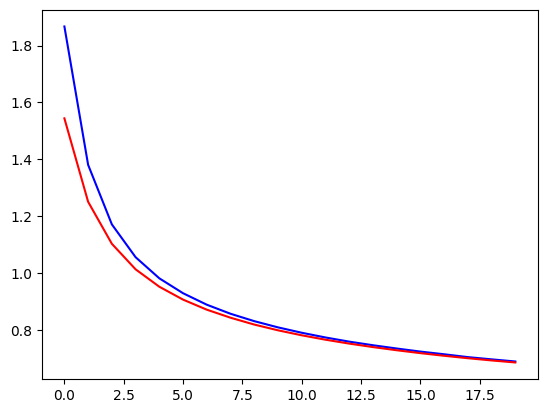

In [65]:
import matplotlib.pyplot as plt 

plt.plot(train_losses,'b')
plt.plot(test_losses,'r')
plt.show()

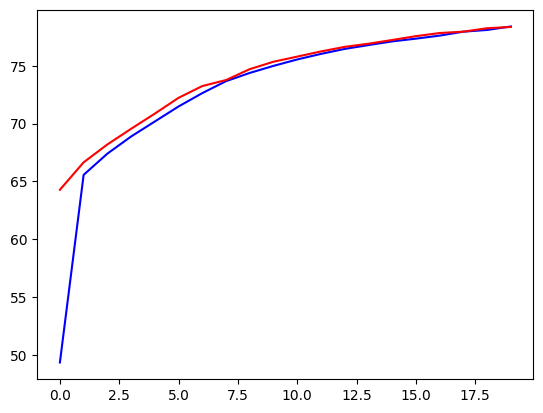

In [66]:
import matplotlib.pyplot as plt 

plt.plot(train_accuaracies,'b')
plt.plot(test_accuracies,'r')
plt.show()